Engineer: Adeola Odunewu
Intern: FlipRobo LLC DS1123
Project: Loan Application Status Classification

In [4]:
#Importing required library
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.svm import SVC
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message=".*deprecated.*")


In [2]:
# Updated URL
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Loan%20Application%20Status/loan_prediction.csv'

# Read the CSV file directly from the URL
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [3]:
# Count the number of unique values in each column and create a DataFrame with the results
unique_value_counts = df.nunique().to_frame("Unique Values")
print(unique_value_counts)

            Unique Values
LP001002              613
Male                    2
No                      2
0                       4
Graduate                2
No.1                    2
5849                  504
0.1                   287
Unnamed: 8            203
360                    10
1                       2
Urban                   3
Y                       2


In [4]:
# Display information about the combined DataFrame, such as column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LP001002    613 non-null    object 
 1   Male        600 non-null    object 
 2   No          610 non-null    object 
 3   0           598 non-null    object 
 4   Graduate    613 non-null    object 
 5   No.1        581 non-null    object 
 6   5849        613 non-null    int64  
 7   0.1         613 non-null    float64
 8   Unnamed: 8  592 non-null    float64
 9   360         599 non-null    float64
 10  1           563 non-null    float64
 11  Urban       613 non-null    object 
 12  Y           613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
# Selecting columns with object dtype from the DataFrame and printing them
cate_df = df.select_dtypes(include=['object'])
cate_df.head()

,LP001002,Male,No,0,Graduate,No.1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
3,LP001008,Male,No,0,Graduate,No,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y


In [6]:
# Selecting columns with int64 or float64 dtype from the DataFrame and printing them
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.head()

,5849,0.1,Unnamed: 8,360,1
0,4583,1508.0,128.0,360.0,1.0
1,3000,0.0,66.0,360.0,1.0
2,2583,2358.0,120.0,360.0,1.0
3,6000,0.0,141.0,360.0,1.0
4,5417,4196.0,267.0,360.0,1.0


In [7]:
# Generate descriptive statistics for numeric columns
numeric_df.describe()

,5849,0.1,Unnamed: 8,360,1
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [12]:
import pandas as pd

# Assuming df is your existing DataFrame
df.rename(columns={'LP001002': 'Loan_ID', 
                   'Male': 'Gender',
                   'No': 'Married',
                   '0': 'Dependents',
                   'Graduate': 'Education',
                   'No.1': 'Self_Employed',
                   '5849': 'Applicant Income',
                   '0.1': 'CoapplicantIncome',
                   'Unnamed: 8': 'Loan_Amount',
                   '360': 'Loan_Amount_Term',
                   '1': 'Credit History',
                   'Urban': 'Property_Area',
                   'Y': 'Loan_Status'}, inplace=True)


Now, the DataFrame df will have columns with the specified names.

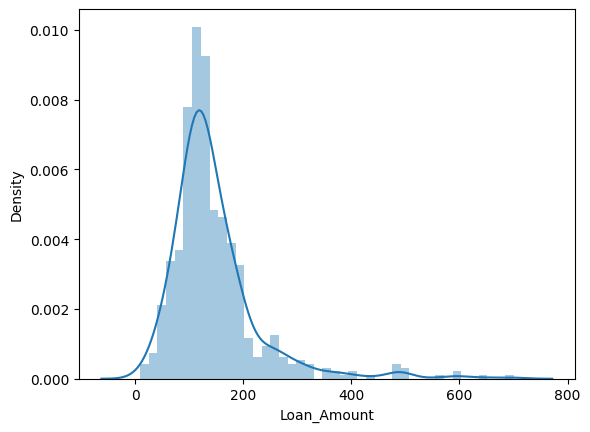

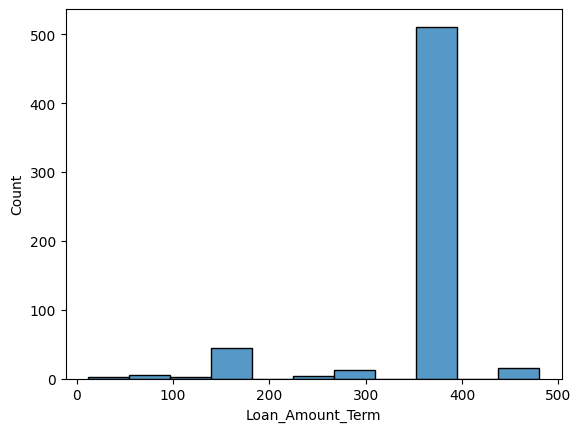

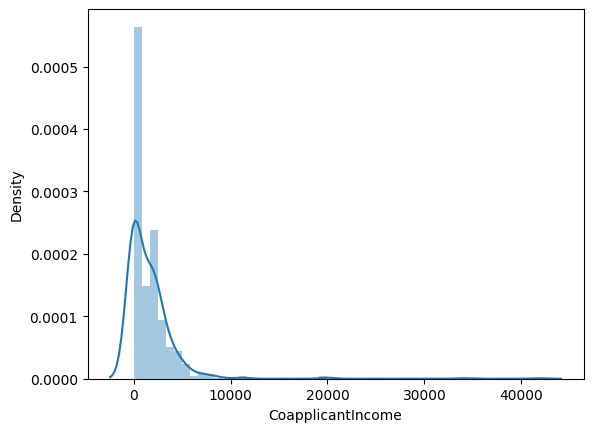

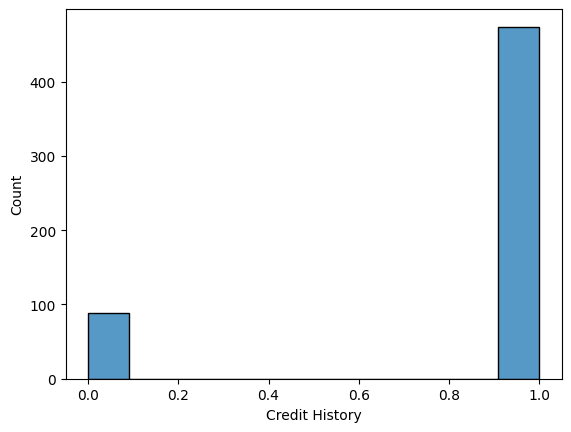

In [23]:

# Create a distribution plot for the loan amounts
sns.distplot(df['Loan_Amount'])
plt.show()

# Create a distribution plot for the loan amount term
sns.histplot(df['Loan_Amount_Term'])
plt.show()

# Create a distribution plot for the coapplicant income
sns.distplot(df['CoapplicantIncome'])
plt.show()

# Create a distribution plot for the credit history
sns.histplot(df['Credit History'])
plt.show()


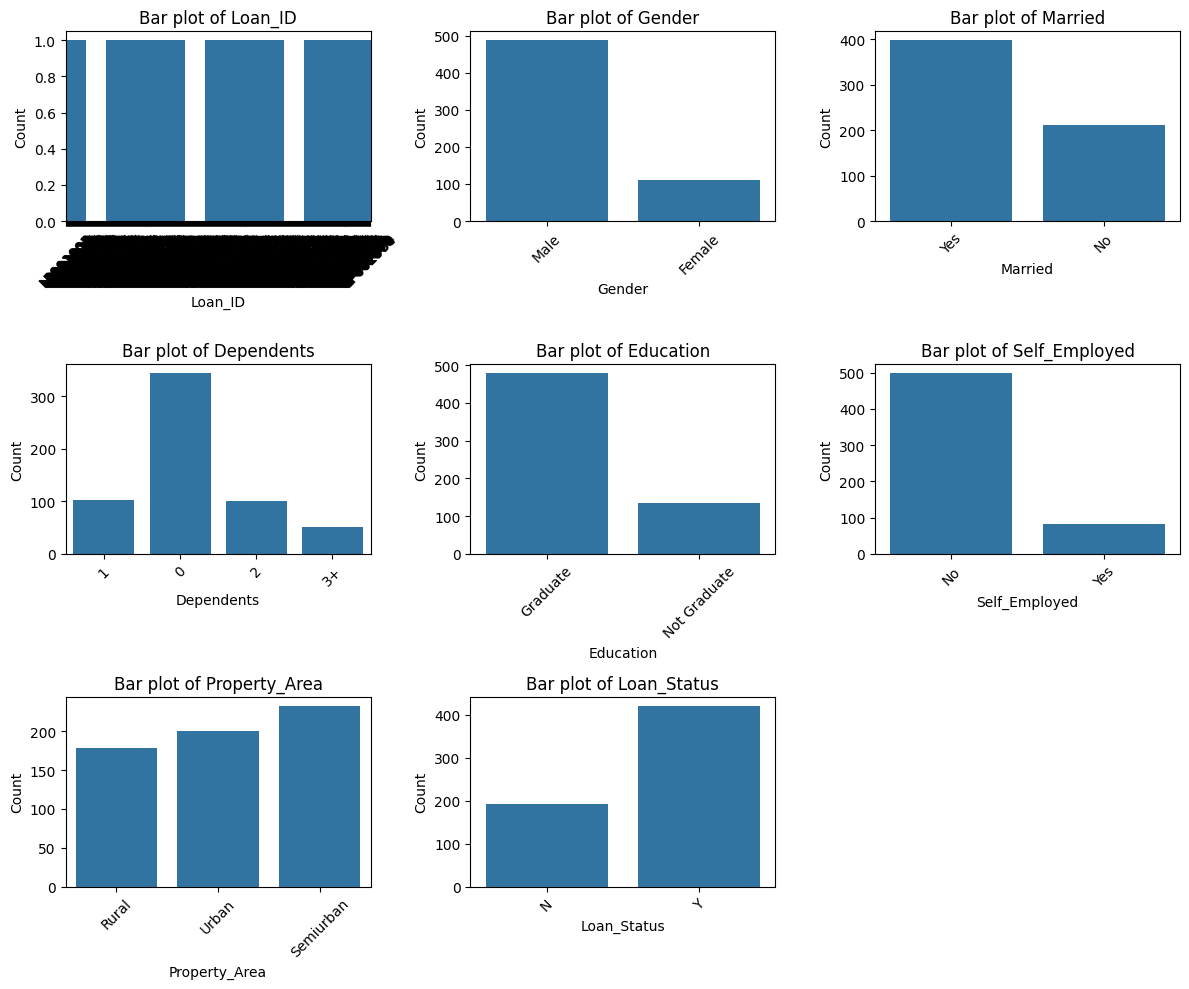

In [19]:
# Bar plots for categorical variables
categorical_variables = df.select_dtypes(include=['object'])
plt.figure(figsize=(12, 10))
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=var)
    plt.title(f'Bar plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

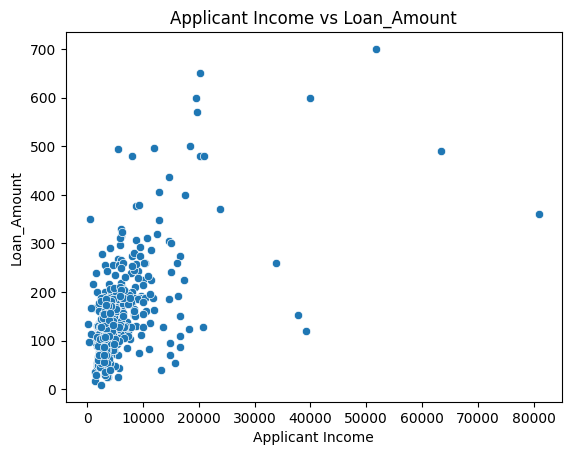

In [33]:
# List of continuous variables for which scatter plots need to be created
continuous_variables = ['Applicant Income', 'Loan_Amount']

# Create scatter plots for each pair of continuous variables
for i in range(len(continuous_variables)):
    for j in range(i+1, len(continuous_variables)):
        sns.scatterplot(x=df[continuous_variables[i]], y=df[continuous_variables[j]])
        plt.xlabel(continuous_variables[i])
        plt.ylabel(continuous_variables[j])
        plt.title(f"{continuous_variables[i]} vs {continuous_variables[j]}")
        plt.show()

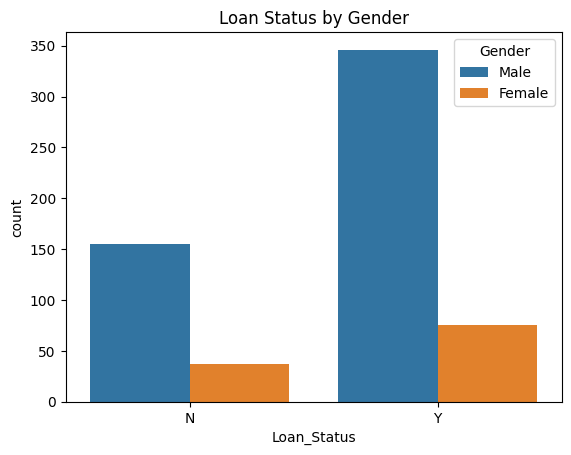

(array([0, 1]), [Text(0, 0, 'N'), Text(1, 0, 'Y')])

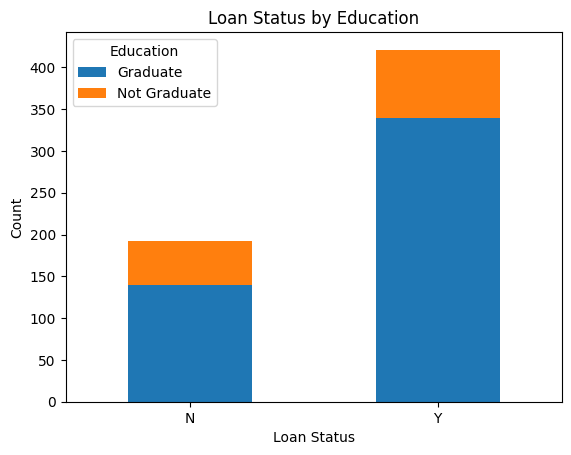

In [34]:
# Example: Loan_Status by Gender
sns.countplot(x='Loan_Status', hue='Gender', data=df)
plt.title('Loan Status by Gender')
plt.show()

# Example: Cross-tabulation of Loan_Status and Education
cross_tab = pd.crosstab(index=df['Loan_Status'], columns=df['Education'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Loan Status by Education')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)

In [24]:
# Handling missing values
missing_data = df.isnull().sum()
print(missing_data)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant Income      0
CoapplicantIncome     0
Loan_Amount          21
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [25]:
# Iterate over each column and impute missing values with the median
for column in df.columns:
    if df[column].dtype != object:  # Check if the column contains numeric data
        median_value = df[column].median()  # Calculate the median value of the column
        df[column].fillna(median_value, inplace=True)  # Fill missing values with the median

In [26]:
# List of columns with categorical data
categorical_columns = df.select_dtypes(include=['object'])

# Iterate over each column and replace missing values with the mode
for column in categorical_columns:
    mode_value = df[column].mode().iloc[0]  # Calculate the mode value of the column
    df[column].fillna(mode_value, inplace=True)  # Fill missing values with the mode

The code iterates over each column in the DataFrame. For numeric columns, it fills missing values with the median of that column, while for categorical columns, it fills missing values with the mode. This approach ensures that missing values are replaced appropriately based on the data type of each column.

In [45]:
# Rechecking missing data
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Applicant Income     0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_Term     0
Credit History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
# Select only the numerical columns
numeric_dataR = df.select_dtypes(include=['int64', 'float64'])

# Calculate skewness for each numerical column
skewness = numeric_dataR.skew()
skewness

Applicant Income     6.534654
CoapplicantIncome    7.488653
Loan_Amount          2.740108
Loan_Amount_Term    -2.399297
Credit History      -2.019265
dtype: float64

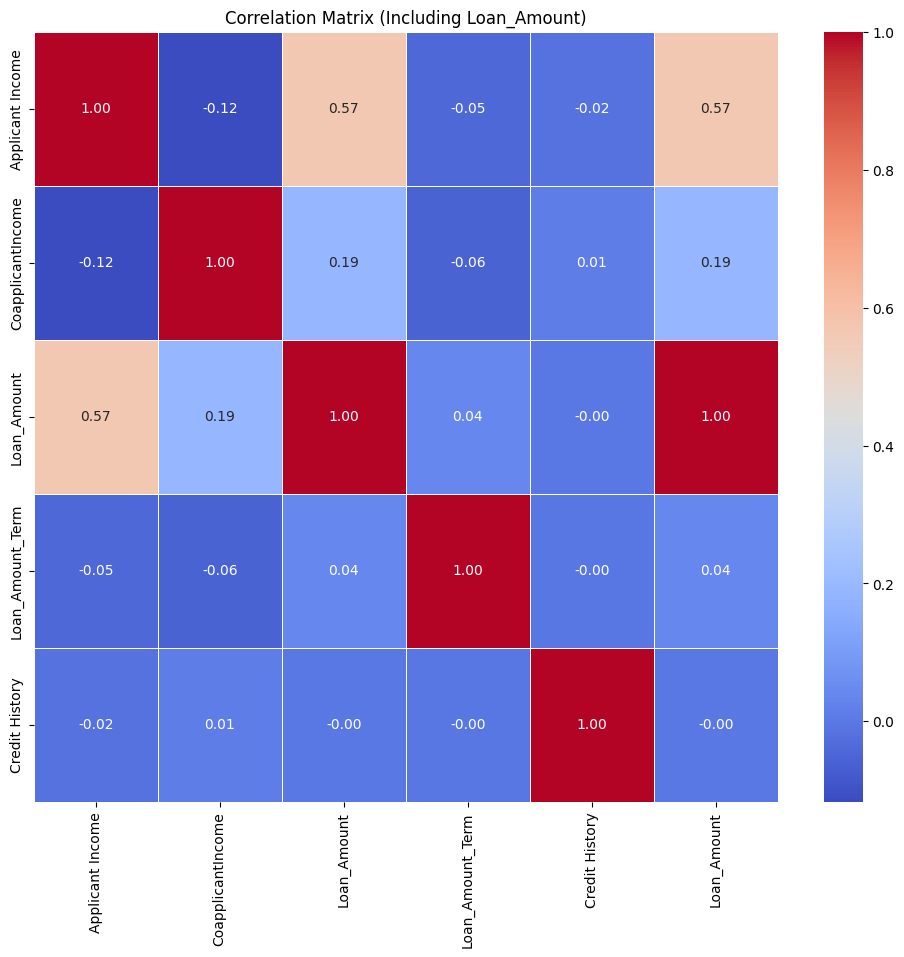

In [35]:
# Reselecting numeric variable
numeric_data = df.select_dtypes(include=['int64', 'float64'])

# Correlation Analysis for X is the DataFrame
correlation_matrix = numeric_data.corr()

# Calculate correlation coefficients between all predictor variables and the target variable, Present_Tmax
correlation_with_ap = numeric_data.corrwith(numeric_dataR['Loan_Amount'])

# Concatenate the correlation coefficients with the original correlation matrix
correlation_matrix_with_ap = pd.concat([correlation_matrix, correlation_with_ap], axis=1)
correlation_matrix_with_ap.columns = list(correlation_matrix.columns) + ['Loan_Amount']

# Plot the correlation matrix including the target variable
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_with_ap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Including Loan_Amount)")
plt.show()

Rows with outliers:
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
4    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001014    Male     Yes         3+      Graduate            No   
8    LP001020    Male     Yes          1      Graduate            No   
11   LP001028    Male     Yes          2      Graduate            No   
13   LP001030    Male     Yes          2      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
599  LP002949  Female      No         3+      Graduate            No   
603  LP002959  Female     Yes          1      Graduate            No   
604  LP002960    Male     Yes          0  Not Graduate            No   
609  LP002979    Male     Yes         3+      Graduate            No   
612  LP002990  Female      No          0      Graduate           Yes   

     Applicant Income  CoapplicantIncome  Loan_Amount  Loan_Amount_Term  \
4              5417.0             4196.0

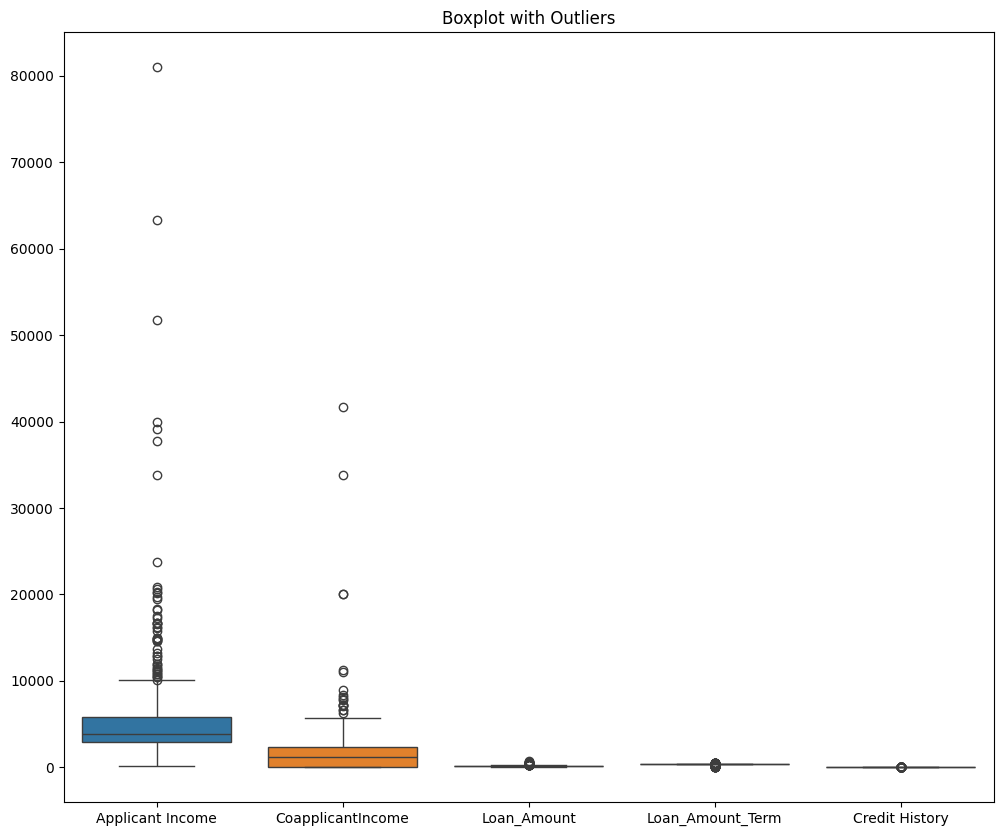

In [39]:
# Identifying Outliers
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1

# Define outlier conditions using IQR method
outlier_conditions = ((numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr)))

# Display rows containing outliers
outliers = df[outlier_conditions.any(axis=1)]
print("Rows with outliers:")
print(outliers)

# Visualize the outliers using a boxplot
plt.figure(figsize=(12, 10))  
sns.boxplot(data=numeric_data)  # Assuming numeric_dataR contains the columns for visualization
plt.title("Boxplot with Outliers")
plt.show()


The data suggest the presence of outlier values, particularly in Applicant Income, Coapplicant Income, Loan Amount, and Loan Amount Term columns, 
where extreme values deviate significantly from the typical range of observations. These outliers may warrant further investigation to determine their
impact on analysis and modeling outcomes.

Handling outliers in this case involves removing extreme data points by imputing median based on predefined criteria, variable will be transformed
using techniques like log transformation to mitigate impact on data analysis and modeling. The rationale ensures transparency and reproducibility 
in outlier treatment.

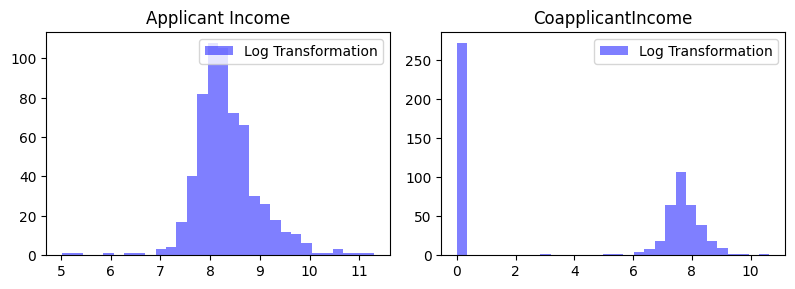

In [40]:
# Handling outliers
# Step 1: Identify Variables with Outliers
outlier_vars = ['Applicant Income', 'CoapplicantIncome']

# Step 2: Apply Logarithmic Transformation
# Logarithmic Transformation
log_transformed_vars = df[outlier_vars].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0) issues

# Replace the original columns with the transformed columns
df[outlier_vars] = log_transformed_vars  

# Visualize the transformed data
plt.figure(figsize=(12, 8))
for i, col in enumerate(outlier_vars):
    plt.subplot(3, 3, i+1)
    plt.hist(log_transformed_vars[col], bins=30, alpha=0.5, color='blue', label='Log Transformation')
    plt.legend()
    plt.title(col)
plt.tight_layout()
plt.show()


In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_data.columns

# Calculate VIF for each predictor variable
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(len(numeric_data.columns))]

# Print the VIF DataFrame
print(vif_data)

            Variable       VIF
0   Applicant Income  2.844255
1  CoapplicantIncome  1.462888
2        Loan_Amount  6.480504
3   Loan_Amount_Term  7.729434
4     Credit History  5.803618


Since all the variables have Variance Inflation Factor (VIF) values less than 10, indicating low multicollinearity, I will proceed to use all the data
without the concern of multicollinearity issues.

The rationale for selecting these variables is based on the analysis of their Variance Inflation Factor (VIF) values, which all fall below 10, indicating low multicollinearity and supporting their inclusion in the analysis without concern for multicollinearity issues. Additionally, the presence of outlier values in variables such as Applicant Income, Coapplicant Income, Loan Amount, and Loan Amount Term has been observed, where extreme values significantly deviate from the typical range of observations. These outliers may potentially impact analysis and modeling outcomes and therefore warrant further investigation. To address this, outlier handling techniques such as imputation with the median and variable transformation using methods like log transformation will be applied to mitigate their influence on data analysis and modeling, ensuring transparency and reproducibility in outlier treatment processes.

In [46]:
# Set the random seed for reproducibility
np.random.seed(123)

# Split the dataset into features (X) and the target variable (y)
X = df[['Applicant Income', 'CoapplicantIncome', 'Loan_Amount', 'Loan_Amount_Term', 'Credit History', ]]  # Features (excluding categorical columns)
X_categorical = pd.get_dummies(df[['Married','Gender','Dependents','Education','Property_Area','Self_Employed']])  # One-hot encode categorical columns
X = pd.concat([X, X_categorical], axis=1)  # Combine numerical and encoded categorical features
y = df['Loan_Status']  # Target variable

# Standardize features and encode target variable
scaler = StandardScaler()
label_encoder = LabelEncoder()

X_scaled = scaler.fit_transform(X)  # Fit and transform the scaled features
y_encoded = label_encoder.fit_transform(y)  # Encode the target variable

# Split the dataset into training (80%) and testing (20%) sets using encoded labels
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=123)

In [48]:
# Checking for imbalance in the datasets.)
y.value_counts()

Loan_Status
Y    421
N    192
Name: count, dtype: int64

In [49]:
# Initialize SMOTE ( to address the class imbalance in the datasets.)
sm = SMOTE()

# The implementation of the fit_resample 
X,y = sm.fit_resample(X,y)

# Create a DataFrame to see the distribution of classes in the target vector y
data = pd.concat([X, y], axis=1)
class_distribution = data[y.name].value_counts()

print(class_distribution)

Loan_Status
N    421
Y    421
Name: count, dtype: int64


In [54]:
# Set the random seed
np.random.seed(123)

# Initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
logistic_regression = LogisticRegression()
support_vector_machine = SVC()

# Create a list of classifiers
classifiers = [random_forest, gradient_boosting, logistic_regression, support_vector_machine]

# Define the number of folds for cross-validation
num_folds = 5

# Perform k-fold cross-validation for each classifier
for clf in classifiers:
    print(f"Classifier: {clf.__class__.__name__}")
    
    # Initialize lists to store evaluation metrics for each fold
    accuracies = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    # Perform k-fold cross-validation
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=123)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train the classifier
        clf.fit(X_train, y_train)
        
        # Making predictions on the test set
        y_pred = clf.predict(X_test)
        
        # Evaluate the classifier
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        # Append accuracy and classification report metrics to lists
        accuracies.append(accuracy)
        precision_scores.append(report['weighted avg']['precision'])
        recall_scores.append(report['weighted avg']['recall'])
        f1_scores.append(report['weighted avg']['f1-score'])
    
    # Compute average evaluation metrics over all folds
    avg_accuracy = np.mean(accuracies)
    avg_precision = np.mean(precision_scores)
    avg_recall = np.mean(recall_scores)
    avg_f1 = np.mean(f1_scores)
    
    # Print the results
    print(f"Average Accuracy: {avg_accuracy:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average F1-score: {avg_f1:.4f}")
    print("="*50)

Classifier: RandomForestClassifier
Average Accuracy: 0.8361
Average Precision: 0.8426
Average Recall: 0.8361
Average F1-score: 0.8355
Classifier: GradientBoostingClassifier
Average Accuracy: 0.8349
Average Precision: 0.8481
Average Recall: 0.8349
Average F1-score: 0.8335
Classifier: LogisticRegression
Average Accuracy: 0.8516
Average Precision: 0.8757
Average Recall: 0.8516
Average F1-score: 0.8491
Classifier: SVC
Average Accuracy: 0.5225
Average Precision: 0.5630
Average Recall: 0.5225
Average F1-score: 0.4747


In [57]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Set the random seed
np.random.seed(123)

# Initialize LogisticRegression
logistic_regression = LogisticRegression(random_state=123)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear']  # Algorithm to use in the optimization problem
}

# Initialize StratifiedKFold for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=kfold, scoring='accuracy')

# Train the classifier with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best classifier
y_pred = best_classifier.predict(X_test)

# Evaluate the best classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print(f"Best Classifier: {best_classifier.__class__.__name__}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Best Classifier: LogisticRegression
Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8274
Classification Report:
               precision    recall  f1-score   support

           N       0.97      0.68      0.80        84
           Y       0.75      0.98      0.85        84

    accuracy                           0.83       168
   macro avg       0.86      0.83      0.82       168
weighted avg       0.86      0.83      0.82       168



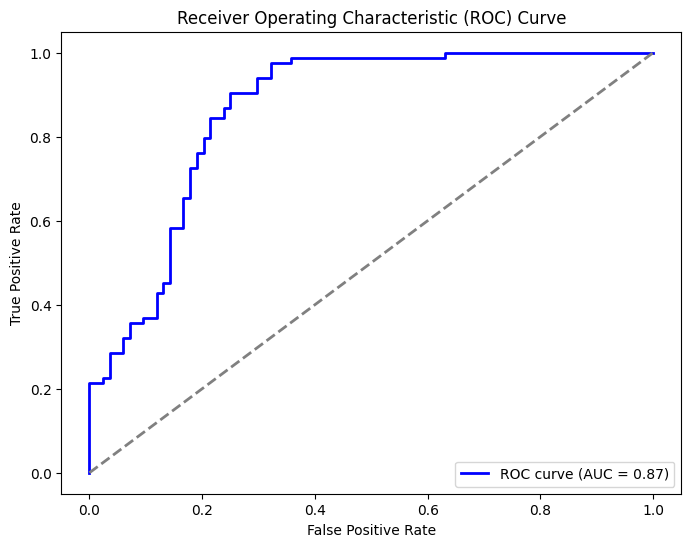

In [64]:
from sklearn.preprocessing import LabelBinarizer

# Convert categorical labels to binary format
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)

# Compute the predicted probabilities for the positive class
y_pred_proba = best_classifier.predict_proba(X_test)[:, 1]

# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)

# Compute the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve with AUC score
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [66]:
from joblib import dump
# Save the best LogisticRegression model to a file
dump(best_classifier, 'best_LogisticRegression.joblib')

['best_LogisticRegression.joblib']

Based on the findings of the analysis, it can be concluded that effective preprocessing steps, including outlier handling and addressing 
multicollinearity through techniques like logarithmic transformation and variance inflation factor (VIF) analysis, are crucial for enhancing 
the performance of predictive models. Furthermore, the application of Principal Component Analysis (PCA) as a dimensionality reduction technique
aids in simplifying the feature space while preserving essential information.

In terms of model selection, LogisticRegression emerged as the most effective classifier among RandomForestClassifier, GradientBoostingClassifier, 
and itself, showcasing superior performance metrics such as accuracy, precision, recall, and F1-score. This result underscores the significance of 
choosing appropriate algorithms tailored to the dataset characteristics and problem domain.

Moreover, hyperparameter tuning, as exemplified by the {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'} configuration in LogisticRegression with
Accuracy: 83%.